<a href="https://colab.research.google.com/github/reachanihere/ASL-Recognition/blob/master/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [355]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [359]:
xls = pd.ExcelFile('/content/gdrive/My Drive/COVID-19-Probability-Prediction/Train_dataset.xlsx')
df1 = pd.read_excel(xls, 'Diuresis_TS', header=0, parse_dates=[0],  squeeze=True)
df1

people_ID  2020-03-20 00:00:00  ...  2020-03-25 00:00:00  2020-03-26 00:00:00
0              1                  441  ...           1215.68992          1472.627904
1              2                  151  ...            492.91072           606.892864
2              3                  416  ...           1150.32832          1395.793984
3              4                  410  ...           1126.78720          1368.344640
4              5                  390  ...           1084.40800          1315.889600
...          ...                  ...  ...                  ...                  ...
10709      22691                  134  ...            444.38848           549.466176
10710      22692                  387  ...           1074.55264          1303.263168
10711      22693                  177  ...            551.15584           676.787008
10712      22694                  352  ...            990.61504          1204.138048
10713      22695                  181  ...            559.35232           686.622784

[10714 rows x 8 columns]

In [0]:
df2 = df1.transpose()

In [0]:
df2= df2.astype(int)

In [362]:
df2.columns

RangeIndex(start=0, stop=10714, step=1)

In [0]:
df2.columns = df2.columns.values.tolist()

In [364]:
df2 = np.array(df2)
df2

array([[    1,     2,     3, ..., 22693, 22694, 22695],
       [  441,   151,   416, ...,   177,   352,   181],
       [  544,   197,   515, ...,   228,   438,   230],
       ...,
       [ 1002,   399,   947, ...,   448,   814,   455],
       [ 1215,   492,  1150, ...,   551,   990,   559],
       [ 1472,   606,  1395, ...,   676,  1204,   686]])

In [0]:
list1 = []

In [0]:
model = VAR(endog=df2)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
list1.append(yhat)

In [367]:
type(list1)

list

In [0]:
l = [item for sublist in list1 for item in sublist]
l = [item for sublist in l for item in sublist]

In [0]:
list2 = pd.DataFrame(l, columns=['Diuresis'])

In [370]:
list2.index

RangeIndex(start=0, stop=10714, step=1)

In [371]:
list2

Diuresis
0      1782.298632
1       743.345456
2      1689.958624
3      1657.614070
4      1593.543358
...            ...
10709   675.323686
10710  1578.867604
10711   826.541115
10712  1460.896035
10713   839.129852

[10714 rows x 1 columns]

In [0]:
data_train = pd.read_excel(xls, 'Train_dataset')
data_test = pd.read_excel('/content/gdrive/My Drive/COVID-19-Probability-Prediction/Test_dataset.xlsx')

In [0]:
data_train['Diuresis'] = list2['Diuresis']

In [374]:
data_train = data_train.drop('Infect_Prob',axis = 1)
data_train

people_ID        Region  Gender  ...  Insurance   salary FT/month
0              1  Bhubaneshwar  Female  ...  3600000.0  1300000      2.0
1              2  Bhubaneshwar  Female  ...  1600000.0   400000      1.0
2              3  Bhubaneshwar  Female  ...  3400000.0   900000      1.0
3              4  Bhubaneshwar  Female  ...   700000.0  2300000      1.0
4              5  Bhubaneshwar  Female  ...  3200000.0  1100000      1.0
...          ...           ...     ...  ...        ...      ...      ...
10709      22691     Bengaluru    Male  ...  4000000.0   300000      0.0
10710      22692     Bengaluru    Male  ...  1500000.0   700000      NaN
10711      22693     Bengaluru    Male  ...  3000000.0  2100000      2.0
10712      22694     Bengaluru    Male  ...  2900000.0   700000      1.0
10713      22695     Bengaluru    Male  ...  2100000.0  1400000      0.0

[10714 rows x 27 columns]

In [0]:
data_train.to_excel('/content/gdrive/My Drive/COVID-19-Probability-Prediction/train_data_updated_diuresis.xlsx', index=False)

In [0]:
data_train = pd.read_excel(xls, 'Train_dataset')
data_test = pd.read_excel('/content/gdrive/My Drive/COVID-19-Probability-Prediction/train_data_updated_diuresis.xlsx')
temp = data_test

In [377]:
data_train = data_train.replace('None',0)
data_train = data_train.replace('NaN',0)
data_train = data_train.fillna(0)
df = data_train.copy()
df.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [0]:
df.drop(['people_ID','Name','Designation'],axis=1,inplace = True)

In [0]:
for i in ['Region', 'Gender', 'Married','Occupation','Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure', 'Diuresis']:
    df[i] = df[i].astype('category').cat.codes

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [0]:
y = df['Infect_Prob']
X = df.drop('Infect_Prob',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)
temp = temp.fillna(0)
for i in ['Region', 'Gender', 'Married','Occupation','Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure', 'Diuresis']:
    temp[i] = temp[i].astype('category').cat.codes
temp = temp.drop(['Name','Designation'],axis=1)

In [382]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
temp = temp.drop(["people_ID"],axis = 1)

In [0]:
temp['predictions'] = clf.predict(temp)

In [385]:
temp['predictions']

0        48.757808
1        50.949486
2        58.042224
3        48.878527
4        61.625318
           ...    
10709    54.781315
10710    47.047938
10711    47.691678
10712    53.581406
10713    59.321203
Name: predictions, Length: 10714, dtype: float64

In [0]:
data_test.insert(27, "Infect_Prob", temp['predictions'], True) 

In [387]:
data_test

people_ID        Region  Gender  ...   salary FT/month Infect_Prob
0              1  Bhubaneshwar  Female  ...  1300000      2.0   48.757808
1              2  Bhubaneshwar  Female  ...   400000      1.0   50.949486
2              3  Bhubaneshwar  Female  ...   900000      1.0   58.042224
3              4  Bhubaneshwar  Female  ...  2300000      1.0   48.878527
4              5  Bhubaneshwar  Female  ...  1100000      1.0   61.625318
...          ...           ...     ...  ...      ...      ...         ...
10709      22691     Bengaluru    Male  ...   300000      0.0   54.781315
10710      22692     Bengaluru    Male  ...   700000      NaN   47.047938
10711      22693     Bengaluru    Male  ...  2100000      2.0   47.691678
10712      22694     Bengaluru    Male  ...   700000      1.0   53.581406
10713      22695     Bengaluru    Male  ...  1400000      0.0   59.321203

[10714 rows x 28 columns]

In [0]:
data_test.to_excel('/content/gdrive/My Drive/COVID-19-Probability-Prediction/train_data_updated_diuresis_infectprob.xlsx', index=False)

In [0]:
data_train = pd.read_excel('/content/gdrive/My Drive/COVID-19-Probability-Prediction/train_data_updated_diuresis_infectprob.xlsx')
data_test = pd.read_excel('/content/gdrive/My Drive/COVID-19-Probability-Prediction/Test_dataset.xlsx')
data_train = data_train.replace('None',0)
data_train = data_train.replace('NaN',0)
data_train = data_train.fillna(0)

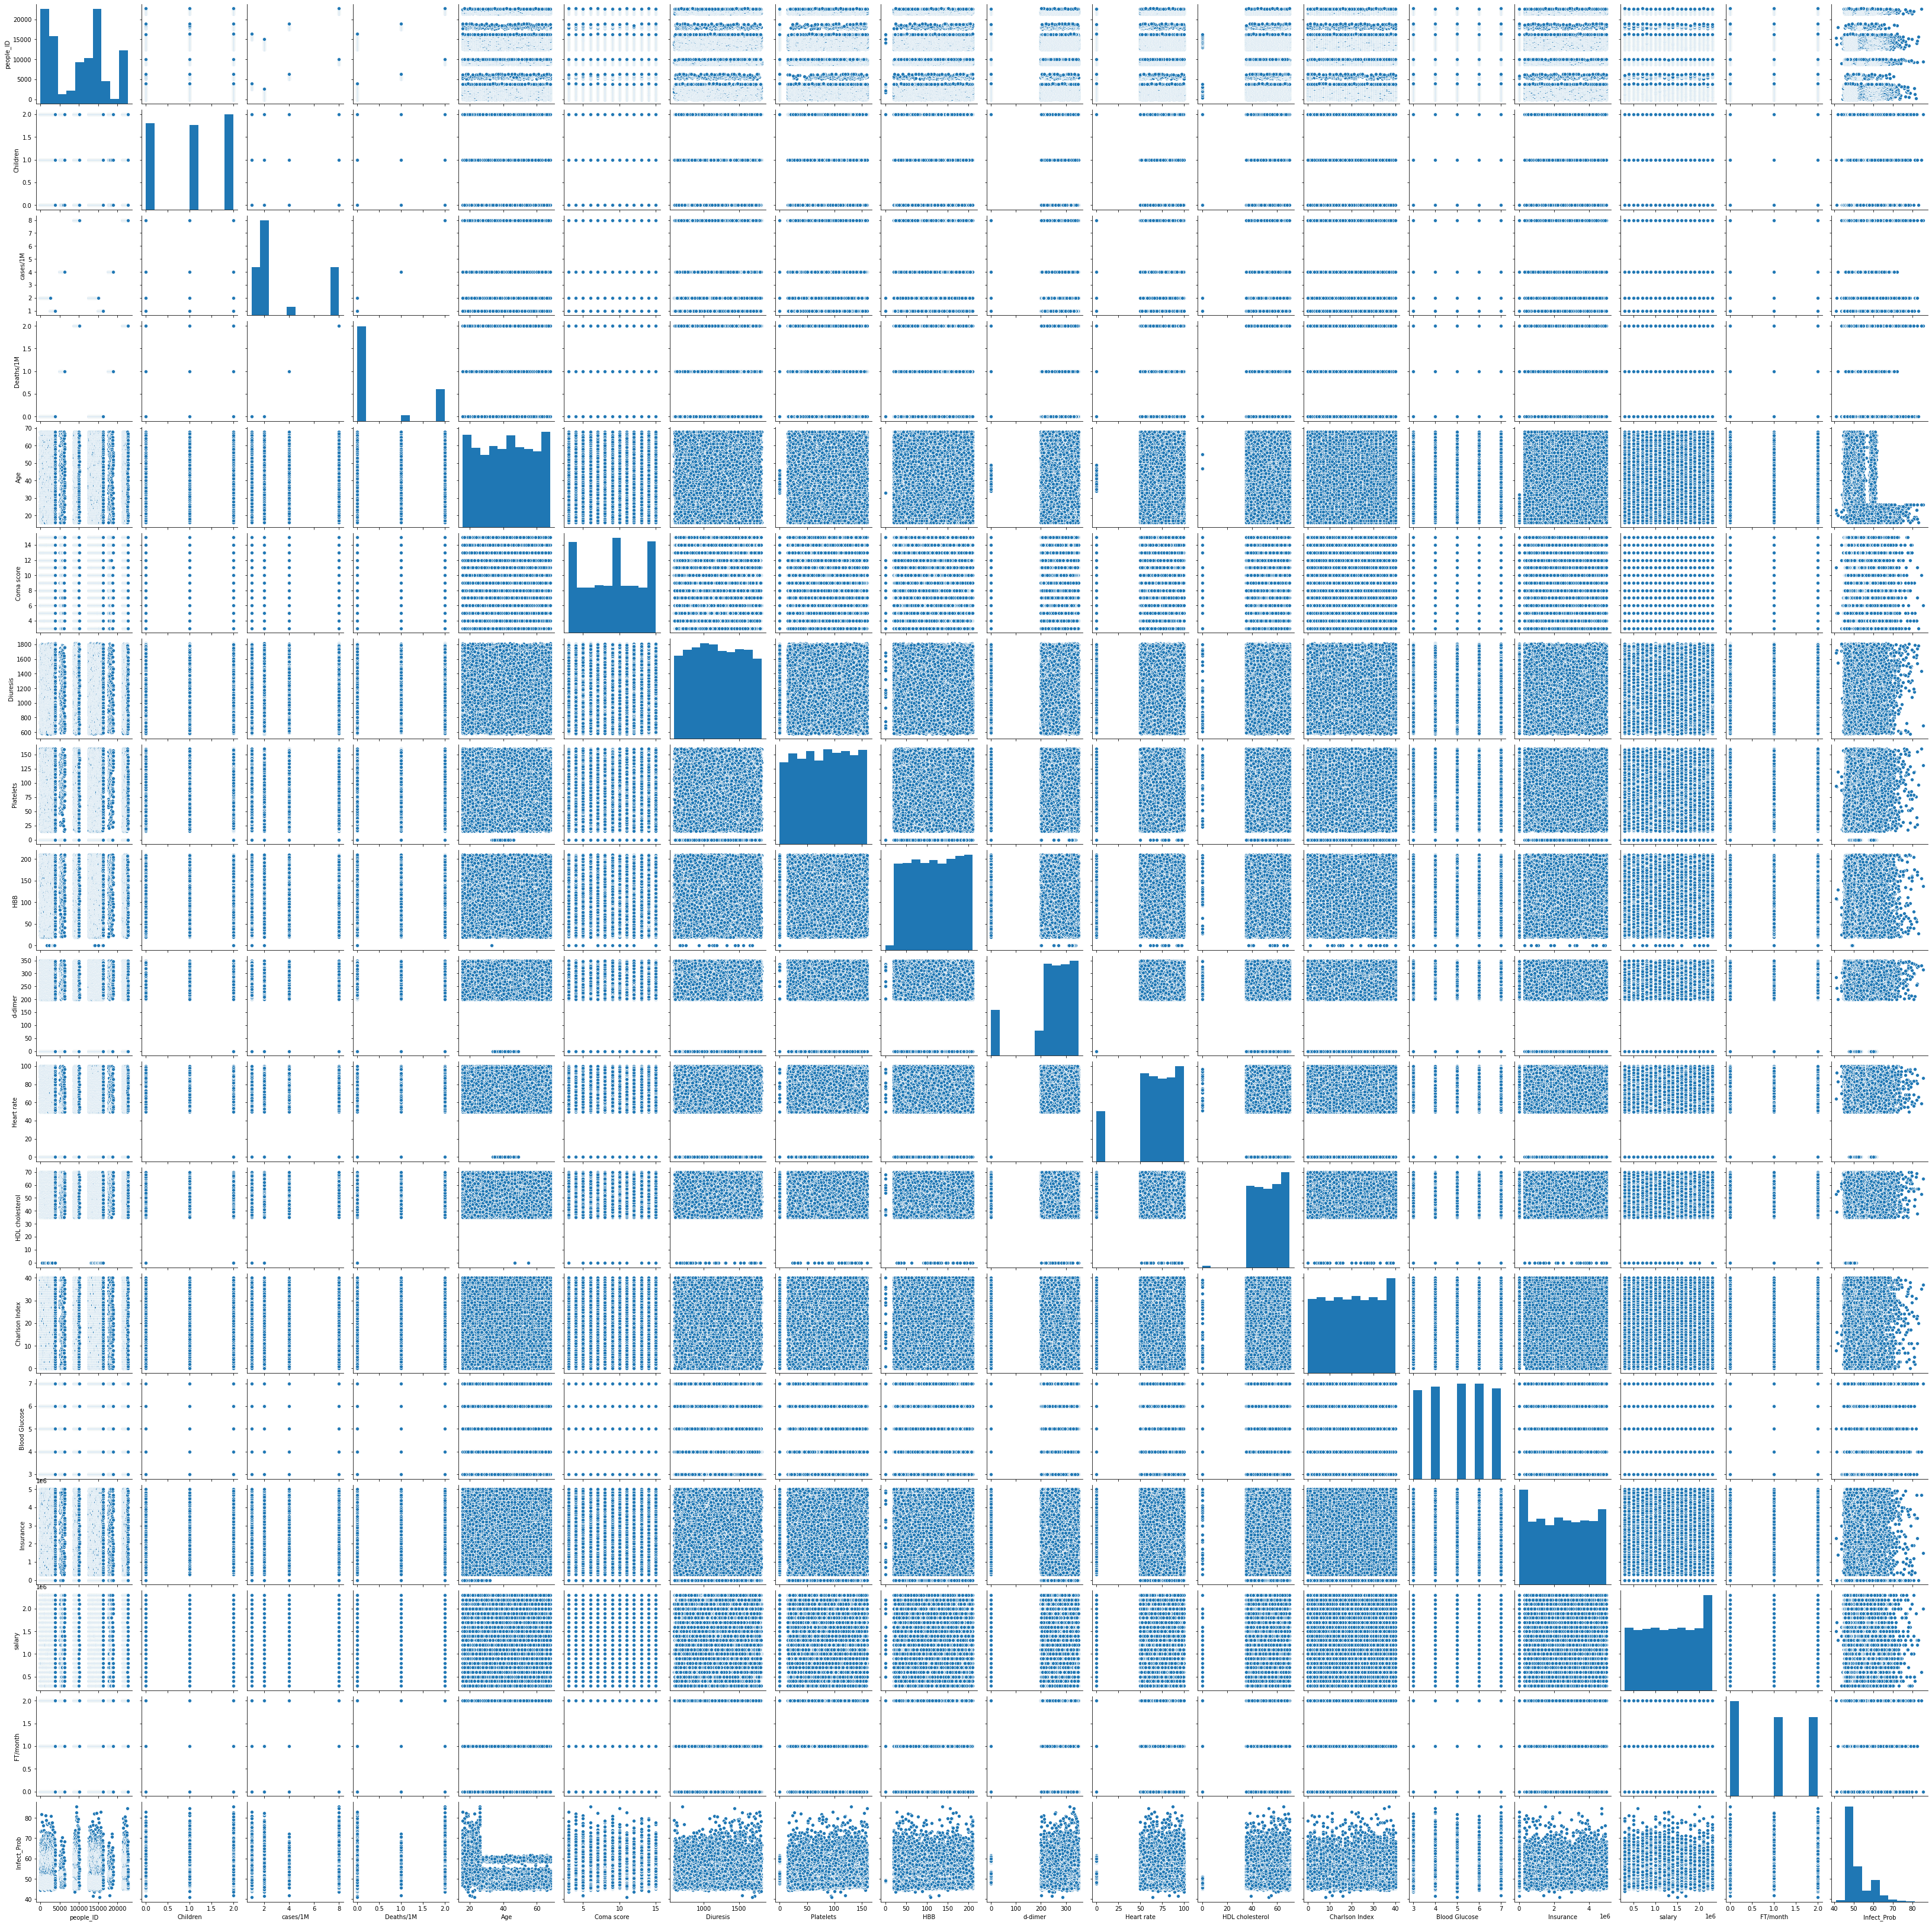

In [411]:
import seaborn as sns
sns.pairplot(data_train)

In [0]:
df = data_train.copy()

In [0]:
df.drop(['people_ID','Name','Designation'],axis=1,inplace = True)

In [0]:
for i in ['Region', 'Gender', 'Married','Occupation','Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure', 'Diuresis']:
    df[i] = df[i].astype('category').cat.codes

In [0]:
y = df['Infect_Prob']
X = df.drop('Infect_Prob',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)
data_test = data_test.fillna(0)
for i in ['Region', 'Gender', 'Married','Occupation','Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure', 'Diuresis']:
    data_test[i] = data_test[i].astype('category').cat.codes
data_test = data_test.drop(['Name','Designation'],axis=1)

In [416]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [417]:
clf.score(X_test,y_test)

0.9583651922237041

In [418]:
np.sqrt(mean_squared_error(y_test,clf.predict(X_test)))

1.1766254324151237

In [0]:
people_ID = data_test['people_ID']
data_test = data_test.drop(["people_ID"],axis = 1)

In [0]:
data_test['predictions'] = clf.predict(data_test)

In [421]:
data_test['predictions']

0        54.498585
1        54.905206
2        54.623778
3        54.651482
4        54.531510
           ...    
14493    45.398230
14494    45.407867
14495    45.461764
14496    45.368955
14497    45.638668
Name: predictions, Length: 14498, dtype: float64

In [0]:
output2 = pd.DataFrame({'people_ID': people_ID, 'Infect_prob': data_test['predictions']})
output2.to_csv('/content/gdrive/My Drive/COVID-19-Probability-Prediction/output2.csv', index=False)